### Deliverable 1: Describe your analytic process and technical results– one to two pages 
    i.	Results from your exploration of the data 
    ii.	Description of changes you made to prepare the data for model development (filtering, transformations, etc.) based on this exploration 
    iii.	What model methodologies did you consider 
    iv.	Which did you use for your final submission and how did you make the decision (what metrics did you use) 
    v.	Are there any caveats about using your chosen model(s)

### Deliverable 2: Document the code used for your final model(s) – no more than two pages

### Deliverable 3: Present results and insights 
#### one to three pages describing what the results from the modeling indicate and how they can help the business (visuals would be very helpful here).

    i. What drives growth in accounts and/or balance between month 0 and month 12. 
    ii.	What demographic types, if any, are more likely to increase (or reduce) their number of accounts and/or balance between month 0 and month 12? 
    iii.	What types of accounts, customer interactions, customer events, or Wells Fargo outreach, are more correlated with account and/or balance change?

### Import and Explore

In [1]:
import pandas as pd
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import and view first 5 rows
data = pd.read_csv('CampusChallengeData.csv')
data.head()

,cust_num,month,cust_demographics_ai,cust_demographics_aii,typeA_ct,typeB_ct,typeC_flag,typeD_flag,typeE_flag,typeF_flag,...,cust_outreach_aiii,cust_outreach_aiv,cust_outreach_av,cust_outreach_avi,cust_outreach_avii,cust_outreach_aviii,wf_outreach_flag_chan_i,wf_outreach_flag_chan_ii,wf_outreach_flag_chan_iii,wf_outreach_flag_chan_iv
0,9246,9,4,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1273,2,3,3,2,1,0,0,0,1,...,0,0,0,2,0,0,0,0,0,0
2,6682,8,3,3,1,3,0,0,0,0,...,2,0,0,0,3,0,0,0,0,0
3,7946,5,4,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3681,4,1,1,1,1,0,0,0,0,...,0,0,0,2,0,0,0,1,0,0


In [3]:
# 120000 records and 29 fields 
data.shape

(120000, 29)

In [4]:
# Get list of Columns 
data.columns

Index([u'cust_num', u'month', u'cust_demographics_ai',
       u'cust_demographics_aii', u'typeA_ct', u'typeB_ct', u'typeC_flag',
       u'typeD_flag', u'typeE_flag', u'typeF_flag', u'typeG_flag',
       u'typeA_bal_cat', u'typeB_bal_cat', u'typeC_bal_cat', u'typeD_bal_cat',
       u'typeE_bal_cat', u'normal_tot_bal', u'cust_outreach_ai',
       u'cust_outreach_aii', u'cust_outreach_aiii', u'cust_outreach_aiv',
       u'cust_outreach_av', u'cust_outreach_avi', u'cust_outreach_avii',
       u'cust_outreach_aviii', u'wf_outreach_flag_chan_i',
       u'wf_outreach_flag_chan_ii', u'wf_outreach_flag_chan_iii',
       u'wf_outreach_flag_chan_iv'],
      dtype='object')

In [5]:
# sort the values by customer and month
data.sort_values(['cust_num','month'],inplace=True)
data.tail()

,cust_num,month,cust_demographics_ai,cust_demographics_aii,typeA_ct,typeB_ct,typeC_flag,typeD_flag,typeE_flag,typeF_flag,...,cust_outreach_aiii,cust_outreach_aiv,cust_outreach_av,cust_outreach_avi,cust_outreach_avii,cust_outreach_aviii,wf_outreach_flag_chan_i,wf_outreach_flag_chan_ii,wf_outreach_flag_chan_iii,wf_outreach_flag_chan_iv
97206,10000,8,3,3,3,2,0,0,0,1,...,3,0,0,3,0,0,0,0,0,0
97735,10000,9,3,3,3,2,0,0,0,1,...,4,0,0,10,0,0,0,0,0,0
96148,10000,10,3,3,3,2,0,0,0,1,...,4,0,1,14,0,0,0,0,0,0
91916,10000,11,3,3,3,2,0,0,0,1,...,3,0,1,9,0,0,0,0,0,0
92974,10000,12,3,3,3,2,0,0,0,1,...,3,0,0,14,1,0,0,0,0,0


In [6]:
# view first customer 
data[['cust_num','month','typeA_bal_cat','normal_tot_bal']].head()

,cust_num,month,typeA_bal_cat,normal_tot_bal
69031,1,1,3,-0.373969
69705,1,2,2,-0.384322
70379,1,3,2,-0.391042
71053,1,4,1,-0.394362
71727,1,5,1,-0.397683


In [7]:
# check for duplicates rows
data[data.duplicated()]

,cust_num,month,cust_demographics_ai,cust_demographics_aii,typeA_ct,typeB_ct,typeC_flag,typeD_flag,typeE_flag,typeF_flag,...,cust_outreach_aiii,cust_outreach_aiv,cust_outreach_av,cust_outreach_avi,cust_outreach_avii,cust_outreach_aviii,wf_outreach_flag_chan_i,wf_outreach_flag_chan_ii,wf_outreach_flag_chan_iii,wf_outreach_flag_chan_iv


In [8]:
# check for null values 
data[data.isnull().any(axis=1)]

,cust_num,month,cust_demographics_ai,cust_demographics_aii,typeA_ct,typeB_ct,typeC_flag,typeD_flag,typeE_flag,typeF_flag,...,cust_outreach_aiii,cust_outreach_aiv,cust_outreach_av,cust_outreach_avi,cust_outreach_avii,cust_outreach_aviii,wf_outreach_flag_chan_i,wf_outreach_flag_chan_ii,wf_outreach_flag_chan_iii,wf_outreach_flag_chan_iv


In [9]:
jan = data[data['month'] == 1]
feb = data[data['month'] == 2]
mar = data[data['month'] == 3]
apr = data[data['month'] == 4]
may = data[data['month'] == 5]
jun = data[data['month'] == 6]
jul = data[data['month'] == 7]
aug = data[data['month'] == 8]
sep = data[data['month'] == 9]
octb = data[data['month'] == 10]
nov = data[data['month'] == 11]
dec = data[data['month'] == 12]

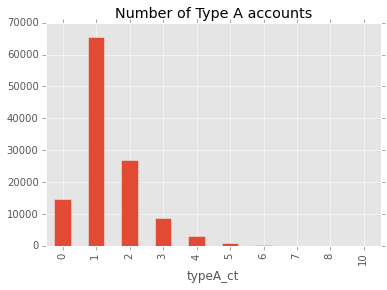

In [97]:
data.groupby('typeA_ct').size().plot('bar',title='Number of Type A accounts')

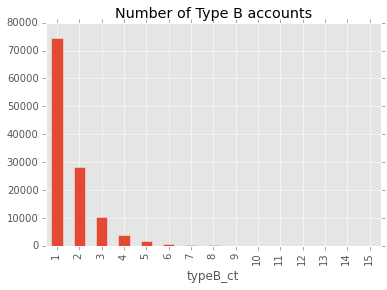

In [52]:
data.groupby('typeB_ct').size().plot('bar',title='Number of Type B accounts')

In [93]:
#pd.pivot_table(data,values = 'typeA_ct',index='month')
data.groupby(['month','typeA_ct']).size()

month  typeA_ct
1      0           1238
       1           5456
       2           2226
       3            744
       4            241
       5             64
       6             19
       7              7
       8              3
       10             2
2      0           1234
       1           5453
       2           2233
       3            742
       4            244
       5             63
       6             19
       7              7
       8              3
       10             2
3      0           1235
       1           5444
       2           2239
       3            745
       4            244
       5             61
       6             19
       7              8
       8              3
       10             2
                   ... 
10     0           1225
       1           5480
       2           2219
       3            730
       4            250
       5             63
       6             19
       7              9
       8              3
       10             2
